In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import plotly.offline as py
py.init_notebook_mode(connected= True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

df = pd.read_excel("loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB


In [5]:
Positive_Decision = df[(df['Decision'] != 0)]
Negative_Decision = df[(df['Decision'] == 0)]

trace= go.Pie(labels= ['Negative_Decision', 'Positive_Decision'], values = df['Decision'].value_counts(),
             textfont=dict(size=15), opacity = 0.8,
             marker = dict(colors=['blue', 'yellow'],
                          line= dict(color='#000000', width=1.5)))

layout= dict(title= 'Distribution of decision variable')

fig = dict(data =[trace], layout=layout)
py.iplot(fig)

In [6]:
missing_df = pd.DataFrame({
    "Columns": df.columns[df.isnull().sum()>0],
    "Values": df[df.columns[df.isnull().sum()>0]].isnull().sum()/len(df)*100
})
missing_df = missing_df.reset_index(drop=True)
missing_df
df.isnull().sum()/len(df)*100

Sex                0.0
Age                0.0
Time_at_address    0.0
Res_status         0.0
Telephone          0.0
Occupation         0.0
Job_status         0.0
Time_employed      0.0
Time_bank          0.0
Liab_ref           0.0
Acc_ref            0.0
Home_Expn          0.0
Balance            0.0
Decision           0.0
dtype: float64

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Res_status'] = encoder.fit_transform(df['Res_status'])
df['Telephone'] = encoder.fit_transform(df['Telephone'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Job_status'] = encoder.fit_transform(df['Job_status'])
df['Acc_ref'] = encoder.fit_transform(df['Acc_ref'])
df['Liab_ref'] = encoder.fit_transform(df['Liab_ref'])
df['Decision'] = encoder.fit_transform(df['Decision'])

df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0,1
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0,1
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200,0
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0,1


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Decision')
y = df['Decision']

X

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,1,34.169998,2.750,0,0,3,4,2,0,1,0,232,200
425,0,22.250000,1.250,1,1,11,6,3,0,0,0,280,0
426,1,23.330000,1.500,0,0,0,0,1,0,0,0,422,200
427,1,21.000000,4.790,1,1,7,2,2,1,1,0,80,300


<AxesSubplot:>

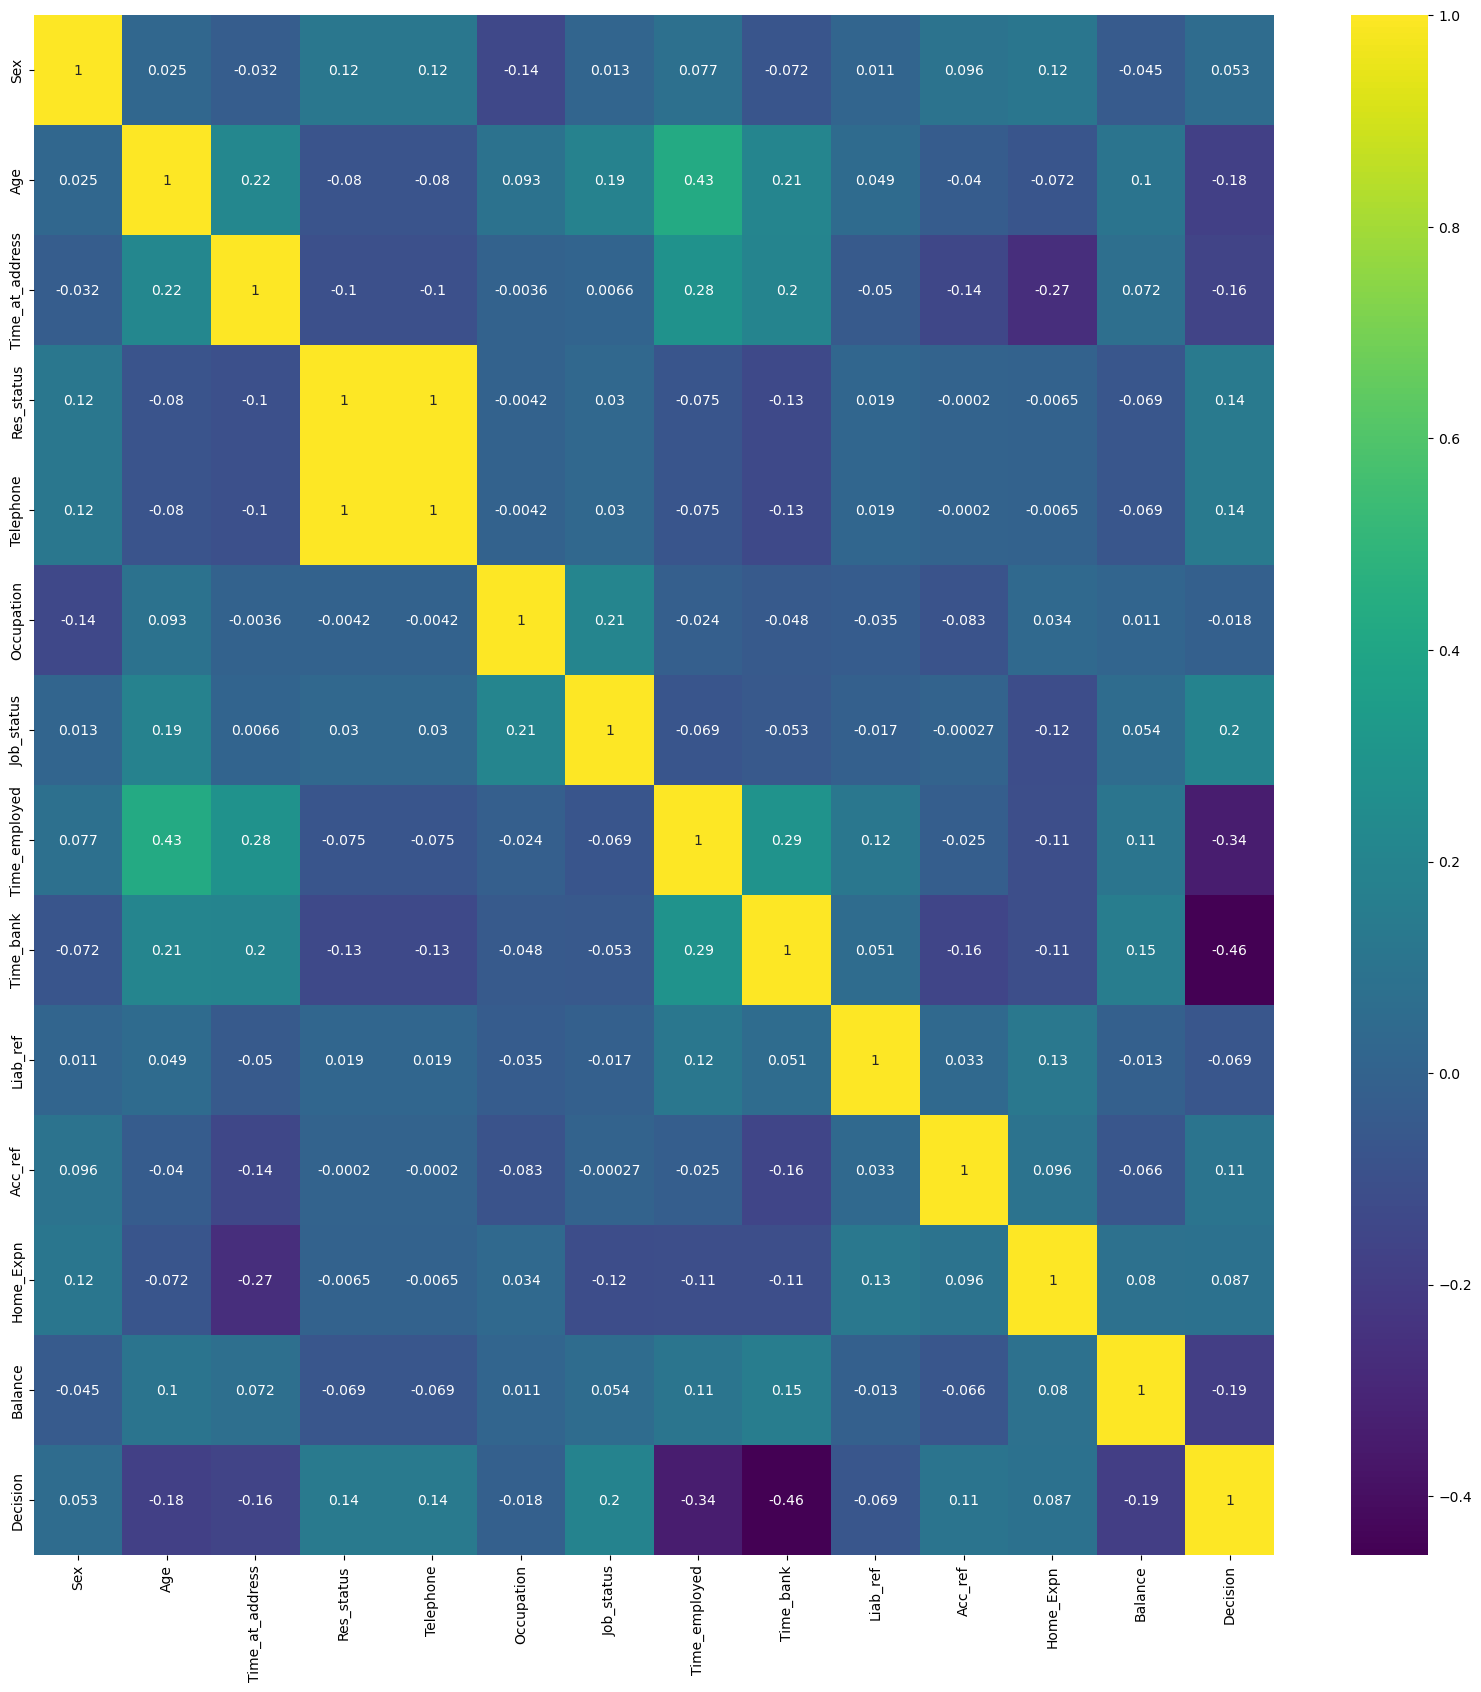

In [9]:
corr_loan = df.corr()
top_corr_features = corr_loan.index
plt.figure(figsize=(20,20))

sns.heatmap(df[top_corr_features].corr(),annot=True, cmap='viridis')

In [10]:
#X = sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               Decision   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              63.78
Date:                Tue, 21 Feb 2023   Prob (F-statistic):                    1.74e-86
Time:                        19:43:07   Log-Likelihood:                         -257.90
No. Observations:                 429   AIC:                                      539.8
Df Residuals:                     417   BIC:                                      588.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [11]:
X.drop(['Occupation', 'Liab_ref'], axis=1, inplace=True)

In [12]:
X

,Sex,Age,Time_at_address,Res_status,Telephone,Job_status,Time_employed,Time_bank,Acc_ref,Home_Expn,Balance
0,1,50.750000,0.585,0,0,6,0,0,0,145,0
1,1,19.670000,10.000,1,1,0,0,0,0,140,0
2,0,52.830002,15.000,0,0,2,5,14,0,0,2200
3,1,22.670000,2.540,1,1,0,2,0,0,0,0
4,1,29.250000,13.000,0,0,0,0,0,0,228,0
...,...,...,...,...,...,...,...,...,...,...,...
424,1,34.169998,2.750,0,0,4,2,0,0,232,200
425,0,22.250000,1.250,1,1,6,3,0,0,280,0
426,1,23.330000,1.500,0,0,0,1,0,0,422,200
427,1,21.000000,4.790,1,1,2,2,1,0,80,300


In [13]:
#X = sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               Decision   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              76.80
Date:                Tue, 21 Feb 2023   Prob (F-statistic):                    2.68e-88
Time:                        19:43:12   Log-Likelihood:                         -258.08
No. Observations:                 429   AIC:                                      536.2
Df Residuals:                     419   BIC:                                      576.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [15]:
X_train

,Sex,Age,Time_at_address,Res_status,Telephone,Job_status,Time_employed,Time_bank,Acc_ref,Home_Expn,Balance
3,1,22.670000,2.540,1,1,0,2,0,0,0,0
18,0,22.500000,0.415,0,0,2,0,0,1,144,0
327,1,25.170000,6.000,0,0,2,1,3,0,0,0
60,1,39.580002,5.000,0,0,6,0,2,0,17,1
369,1,40.250000,21.500,0,0,3,20,11,0,0,1200
...,...,...,...,...,...,...,...,...,...,...,...
71,1,22.920000,3.165,1,1,2,0,0,0,160,1058
106,1,69.169998,9.000,0,0,6,4,1,0,70,6
270,1,26.330000,13.000,0,0,5,0,0,0,140,1110
348,1,22.580000,1.500,1,1,2,0,0,0,120,67


In [16]:
print('Train dataset X: ', X_train.shape, ', Test dataset X: ', X_test.shape)

Train dataset X:  (321, 11) , Test dataset X:  (108, 11)


In [17]:
print('Train dataset y: ', y_train.shape, ', Test dataset y: ', y_test.shape)

Train dataset y:  (321,) , Test dataset y:  (108,)


In [18]:
from sklearn.impute import SimpleImputer

X_train.iloc[:, 0]

3      1
18     0
327    1
60     1
369    1
      ..
71     1
106    1
270    1
348    1
102    0
Name: Sex, Length: 321, dtype: int32

In [19]:
y_train

3      0
18     1
327    0
60     1
369    0
      ..
71     1
106    1
270    1
348    1
102    1
Name: Decision, Length: 321, dtype: int32

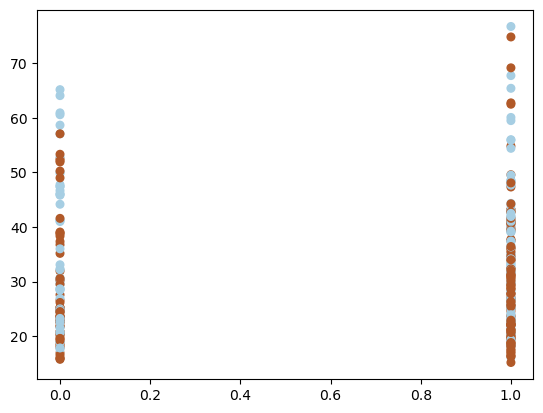

In [20]:
import numpy as np
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf', random_state=0)
clf_rbf.fit(X_train,y_train)

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.show()

In [21]:
X_pred = clf_rbf.predict(X_train)
acc = accuracy_score(X_pred, y_train)
print('Accuracy: ', acc)

Accuracy:  0.6697819314641744


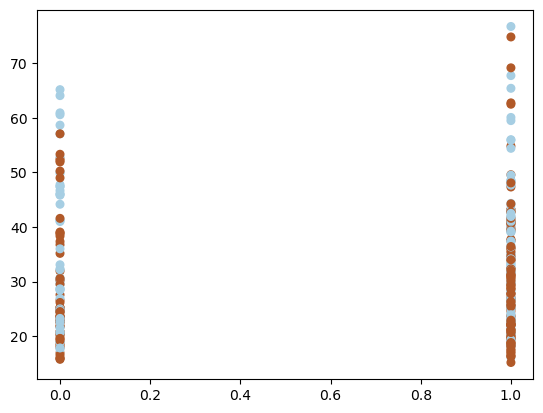

In [23]:
clf_poly = svm.SVC(kernel='poly', degree=4)
clf_poly.fit(X_train,y_train)

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.show()

In [24]:
X_pred = clf_poly.predict(X_train)
acc = accuracy_score(X_pred, y_train)
print('Accuracy: ', acc)

Accuracy:  0.6012461059190031


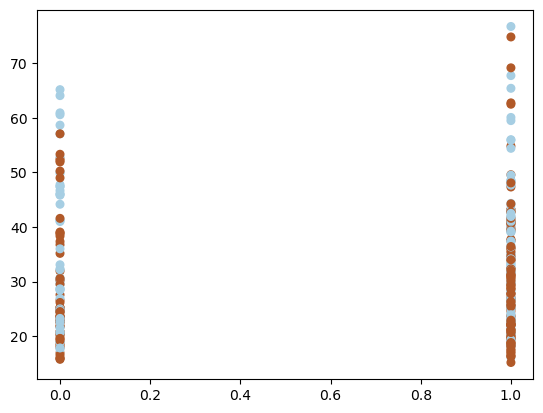

In [26]:
clf_lin = svm.SVC(kernel='linear').fit(X_train,y_train)
clf_lin.fit(X_train,y_train)

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.show()

In [27]:
X_pred = clf_lin.predict(X_train)
acc = accuracy_score(X_pred, y_train)
print('Accuracy: ', acc)

Accuracy:  0.7881619937694704
